In [ ]:
import nilearn
from nilearn import plotting, image

ModuleNotFoundError: No module named 'nilearn'

In [ ]:
pip install nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 18.7 MB/s eta 0:00:00


In [ ]:
path = '/content/drive/MyDrive/2024 Big Data Analytics/Data'

In [ ]:
path = '/content/drive/MyDrive/2024 Big Data Analytics/Data/sub-01/func/sub-01_task-auditoryperception_run-01_bold.nii.gz'

In [ ]:
## visuilize data

In [ ]:
from nilearn import plotting, image
from ipywidgets import widgets, interact

# Load the 4D image
file_path = path  # Replace with the path to your .nii.gz file
img = image.load_img(file_path)

# Function to view a given time point
def view_time_point(time_point):
    # Select the specific volume at the time point
    img_3d = image.index_img(img, time_point)

    # Display the interactive viewer in the Jupyter notebook
    display = plotting.view_img(img_3d, threshold='90%', cmap='coolwarm')
    # display.open_in_browser()  # Use this if you want to open in an external browser
    return display  # This will display the viewer inline in the Jupyter notebook

# Generate a slider for selecting the time point
time_slider = widgets.IntSlider(min=0, max=img.shape[-1] - 1, step=1, value=0, description='Time Point')

# Create an interactive widget to browse through the time points
interact(view_time_point, time_point=time_slider)


ModuleNotFoundError: No module named 'nilearn'

interactive(children=(IntSlider(value=0, description='Time Point', max=152), Output()), _dom_classes=('widget-…

<function __main__.plot_time_point(time_point, img)>

<Figure size 800x400 with 0 Axes>

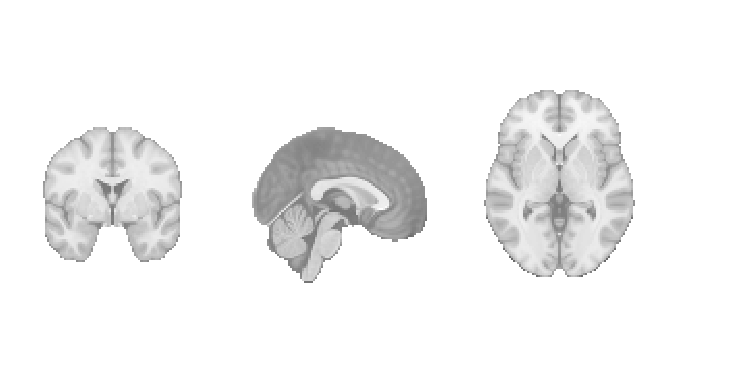

<Figure size 800x400 with 0 Axes>

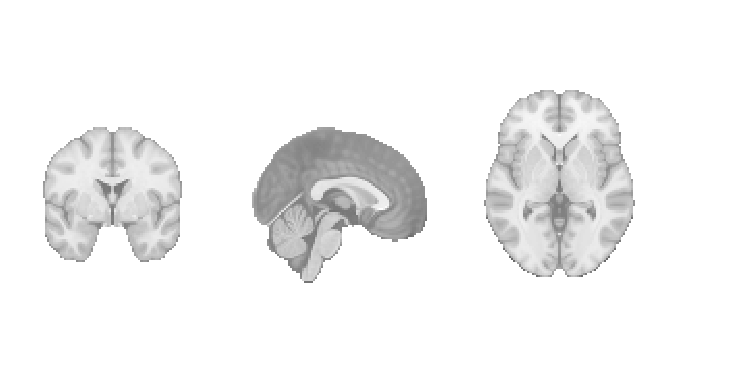

<Figure size 800x400 with 0 Axes>

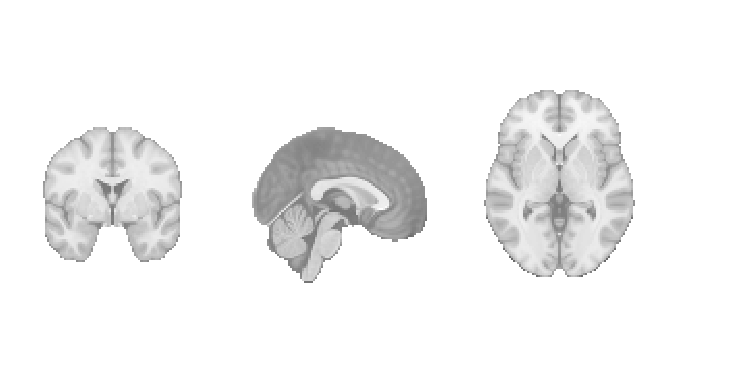

In [ ]:
from nilearn import plotting, image
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact, fixed

# Load the 4D image
file_path = '/content/drive/MyDrive/2024 Big Data Analytics/Data/Train/sub-01_task-auditoryperception_run-01_bold.nii.gz'  # Replace with the path to your .nii.gz file
img = image.load_img(file_path)

# Function to plot a given time point
def plot_time_point(time_point, img):
    # Select the specific volume at the time point
    img_3d = image.index_img(img, time_point)

    # Set up the figure
    plt.figure(figsize=(8, 4))
    # Plot the 3D image using plot_stat_map
    display = plotting.plot_stat_map(img_3d, display_mode='ortho', threshold='90%', cut_coords=(0, 0, 0), cmap='coolwarm')

    # Show the plot
    plt.show()

# Generate a slider for selecting the time point
time_slider = widgets.IntSlider(min=0, max=img.shape[-1] - 1, step=1, value=0, description='Time Point')

# Create an interactive widget to browse through the time points
interact(plot_time_point, time_point=time_slider, img=fixed(img))


In [ ]:
img.shape

(160, 160, 36, 153)

In [ ]:
import pandas as pd

# Replace 'file_path' with the actual path to your .tsv file.
file_path = '/content/drive/MyDrive/2024 Big Data Analytics/Data/sub-01/func/sub-01_task-auditoryperception_run-01_events.tsv'

# Use pandas to read the TSV file. The 'sep' parameter specifies that the separator is a tab character.
events_df = pd.read_csv(file_path, sep='\t')

# Display the first few rows of the DataFrame.
print(events_df.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/2024 Big Data Analytics/Data/sub-01/func/sub-01_task-auditoryperception_run-01_events.tsv'

In [ ]:
import os
import pandas as pd
import nibabel as nib

# Directory where the nii.gz and tsv files are stored
data_dir = '/content/drive/MyDrive/2024 Big Data Analytics/Data/Train'

# Initialize lists to hold the data and labels
X = []  # This will store the 3D brain images
y = []  # This will store the corresponding labels

# TR (Repetition Time) is 2 seconds
TR = 2.0

# Function to pad subject and run IDs with leading zeros if necessary
pad_id = lambda x: str(x).zfill(2)

count = 0

# Iterate over each subject
for subject_id in range(1, 6):  # Assuming subjects are labeled from 01 to 09
    # Iterate over runs, assuming there's an unknown number of runs
    for run_id in range(1, 10):  # Adjust the range as needed to cover all possible runs
        # Format the file names with leading zeros
        nii_path = f"sub-{pad_id(subject_id)}_task-auditoryperception_run-{pad_id(run_id)}_bold.nii.gz"
        tsv_path = f"sub-{pad_id(subject_id)}_task-auditoryperception_run-{pad_id(run_id)}_events.tsv"

        # Construct the full file paths
        nii_file_path = os.path.join(data_dir, nii_path)
        tsv_file_path = os.path.join(data_dir, tsv_path)

        # Check if the files exist before proceeding
        if os.path.exists(nii_file_path) and os.path.exists(tsv_file_path):
            img = nib.load(nii_file_path)
            events = pd.read_csv(tsv_file_path, sep='\t')

            # Process each event in the events file
            for index, row in events.iterrows():
                # Calculate the volume index (zero-based indexing in Python)
                volume_index = int((row['onset'] + 6) / TR) - 1
                # Get the label
                label = row['trial_type']

                # Check if the volume index is within the bounds of the number of volumes
                if 0 <= volume_index < img.shape[-1]:
                    # Extract the 3D image corresponding to the onset time
                    img_3d = img.slicer[:,:,:,volume_index].get_fdata()
                    print(count)
                    count += 1

                    # Append the 3D image and label to the lists
                    X.append(img_3d)
                    y.append(label)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
import numpy as np
data_dir = '/content/drive/MyDrive/2024 Big Data Analytics/Data/New/1-5'
# Convert lists to numpy arrays
X_np = np.array(X)
y_np = np.array(y)

# Save the 3D images and labels to disk using NumPy's .npy format
np.save(os.path.join(data_dir, 'X_images.npy'), X_np)
np.save(os.path.join(data_dir, 'y_labels.npy'), y_np)

NameError: name 'X' is not defined

In [ ]:
import os
import pandas as pd
import nibabel as nib

# Directory where the nii.gz and tsv files are stored
data_dir = '/content/drive/MyDrive/2024 Big Data Analytics/Data/Train'

# Initialize lists to hold the data and labels
X = []  # This will store the 3D brain images
y = []  # This will store the corresponding labels

# TR (Repetition Time) is 2 seconds
TR = 2.0

# Function to pad subject and run IDs with leading zeros if necessary
pad_id = lambda x: str(x).zfill(2)

nii_path = f"sub-{pad_id(1)}_task-auditoryperception_run-{pad_id(1)}_bold.nii.gz"
tsv_path = f"sub-{pad_id(1)}_task-auditoryperception_run-{pad_id(1)}_events.tsv"

# Construct the full file paths
nii_file_path = os.path.join(data_dir, nii_path)
tsv_file_path = os.path.join(data_dir, tsv_path)

count = 0
# Check if the files exist before proceeding
if os.path.exists(nii_file_path) and os.path.exists(tsv_file_path):
    img = nib.load(nii_file_path)
    events = pd.read_csv(tsv_file_path, sep='\t')

    # Process each event in the events file
    for index, row in events.iterrows():
        # Calculate the volume index (zero-based indexing in Python)
        volume_index = int((row['onset'] + 6) / TR) - 1
        # Get the label
        label = row['trial_type']

        # Check if the volume index is within the bounds of the number of volumes
        if 0 <= volume_index < img.shape[-1]:
            # Extract the 3D image corresponding to the onset time
            print(count)
            count += 1
            img_3d = img.slicer[:,:,:,volume_index].get_fdata()
            # Append the 3D image and label to the lists
            X.append(img_3d)
            y.append(label)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
y

['rocknroll',
 'symphonic',
 'rocknroll',
 'metal',
 'symphonic',
 'country',
 'country',
 'ambient',
 'ambient',
 'country',
 'symphonic',
 'symphonic',
 'ambient',
 'metal',
 'metal',
 'ambient',
 'rocknroll',
 'country',
 'rocknroll',
 'ambient',
 'symphonic',
 'metal',
 'country',
 'metal',
 'rocknroll']

In [ ]:
X[0].shape

(160, 160, 36)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock3D(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock3D, self).__init__()
        self.conv1 = nn.Conv3d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False
        )
        self.bn1 = nn.BatchNorm3d(planes)
        self.conv2 = nn.Conv3d(
            planes, planes, kernel_size=3, stride=1, padding=1, bias=False
        )
        self.bn2 = nn.BatchNorm3d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv3d(
                    in_planes,
                    self.expansion * planes,
                    kernel_size=1,
                    stride=stride,
                    bias=False,
                ),
                nn.BatchNorm3d(self.expansion * planes),
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet3D(nn.Module):
    def __init__(self, block, num_blocks, num_classes=1000, num_channels=1):
        super(ResNet3D, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv3d(
            num_channels, 64, kernel_size=7, stride=2, padding=3, bias=False
        )
        self.bn1 = nn.BatchNorm3d(64)
        self.maxpool = nn.MaxPool3d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool3d((1, 1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.maxpool(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

def ResNet18_3D(num_classes, num_channels=1):
    return ResNet3D(BasicBlock3D, [2, 2, 2, 2], num_classes=num_classes, num_channels=num_channels)

# Create a ResNet-18 model for 3D data with a specified number of input channels
model = ResNet18_3D(num_classes=4, num_channels=1)  # Adjust num_channels based on your data
print(model)


ResNet3D(
  (conv1): Conv3d(1, 64, kernel_size=(7, 7, 7), stride=(2, 2, 2), padding=(3, 3, 3), bias=False)
  (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool3d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock3D(
      (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (bn2): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock3D(
      (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv3d(64

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader, random_split
from sklearn.preprocessing import label_binarize
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split


# Encode the labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Convert the class labels to a binary format for AUC calculation
y_binary = label_binarize(y_encoded, classes=np.unique(y_encoded))

# Convert to PyTorch tensors
X_tensor = torch.stack([torch.Tensor(image) for image in X])
y_tensor = torch.LongTensor(y_encoded)

# Create a dataset from tensors
dataset = TensorDataset(X_tensor, y_tensor)

# Determine the size of the split
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Create a dataset and split into train and validation sets
train_dataset, val_dataset = random_split(dataset, [int(len(dataset)*0.8), len(dataset) - int(len(dataset)*0.8)])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4)

# Initialize the model
model = ResNet18_3D(num_classes=len(label_encoder.classes_), num_channels=1)
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_labels = []
    train_preds = []
    for images, labels in train_loader:
        # Print images.shape to confirm the input size if necessary
        # print(images.shape)
        optimizer.zero_grad()
        images = images.unsqueeze(1)  # Add a channel dimension if your images are grayscale
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, preds = torch.max(outputs, 1)
        train_labels.extend(labels.cpu().numpy())
        train_preds.extend(preds.cpu().numpy())

    train_accuracy = np.mean(np.array(train_preds) == np.array(train_labels))
    train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(train_labels, train_preds, average='weighted')

    # Validation phase
    model.eval()
    val_labels = []
    val_preds = []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.unsqueeze(1)  # Add a channel dimension if your images are grayscale
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            val_labels.extend(labels.cpu().numpy())
            val_preds.extend(preds.cpu().numpy())

    val_accuracy = np.mean(np.array(val_preds) == np.array(val_labels))
    val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(val_labels, val_preds, average='weighted')

    # Print metrics for both training and validation
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Training - Accuracy: {train_accuracy}, Precision: {train_precision}, Recall: {train_recall}, F1 Score: {train_f1}")
    print(f"Validation - Accuracy: {val_accuracy}, Precision: {val_precision}, Recall: {val_recall}, F1 Score: {val_f1}")


